# DETECTR 015 Analysis
This notebook is for formatting, analyzing and plotting the DETECTR_011 data. 

## Objective
Test all varying gDNA background, varying gRNA concentration and varying reporter concentration

## Formatting to CSV file
Take txt file from plate reader and turn into tidy data format

In [3]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

#import holoviews as hv
#import bokeh
#import hvplot.pandas
#plotting libraries 
#hv cannot be exported as a pdf - use matplotlib instead

In [4]:
#read in CSV file
DETECTR_raw = pd.read_csv("~/Desktop/DETECTR_015_A.txt", encoding='utf-16', sep="\t", delimiter="\t",index_col=None, skiprows= 3,header = None)
#the first 3 rows of our txt file is junk so we got rid of it here

In [12]:
DETECTR_raw.tail(10)[[17]]
#.tail = see the end of the spreadsheet
#.head = see the beginning 
#(10)= number of rows 
#[]=show row
#[[]]=show column 
#can use (10) and [[17]] at the same time

,17
396,2.938
397,2.927
398,2.914
399,3.226
400,NaN
401,NaN
402,NaN
403,NaN
404,NaN
405,NaN


In [14]:
#drop unnecessary rows at the end of the csv
DETECTR_raw = DETECTR_raw.drop(list(range(len(DETECTR_raw)-6, len(DETECTR_raw))), axis=0)
#axis=0 means drop based on the row, axis=1 means drop based on the column
#writing over the file; if you just want to see what it looks like, don't need DETECTR_raw = 

In [12]:
#select only the first columns
DETECTR_raw = DETECTR_raw.iloc[:,0:26]
#can select the columns you want, or get rid of everything else 

In [18]:
DETECTR_015A = DETECTR_raw[[0,17]]
#want column 0 because it contains the time + column 17 because it contains our data here

In [19]:
#how many plate reads did we have?
#16 = number of rows in the plate
len(DETECTR_015A)/16

25.0

In [20]:
#set a variable to identify the number of plate reads
#int = integer 
#we need this because we want to use it later - to look at a single well over time, or to look at all of the wells at a given time point
num_plate_reads = int(len(DETECTR_raw)/16)

In [21]:
#create a dictionary (basically keys) mapping the row number to a letter for 384 and 96
well_dict_384 = {1:"A",2:"B",3:"C",4:"D",5:"E",6:"F",7:"G",8:"H",9:"I",10:"J",11:"K",12:"L",13:"M",14:"N",15:"O",16:"P"}
well_dict_96 = {1:"A",2:"A",3:"B",4:"B",5:"C",6:"C",7:"D",8:"D",9:"E",10:"E",11:"F",12:"F",13:"G",14:"G",15:"H",16:"H"}

In [22]:
#initialize the cleaned data frame
#tells us which well each of our data points are in 
DETECTR_cleaned = pd.DataFrame(columns = ['time','row_384','column_384', 'row_96','column_96','rfu_value'])

In [23]:
DETECTR_015A.head(10)

,0,17
0,00:00:00,6.174
1,NaN,3.191
2,NaN,10.078
3,NaN,2.864
4,NaN,9.108
5,NaN,2.869
6,NaN,7.380
7,NaN,2.856
8,NaN,7.503
9,NaN,2.824


In [27]:
#iterate over each plate to create a dataframe with the correct time, the 384 and 96 position and the RFU_value
#not super robust - highly dependent on which column you're looking at
#iloc - looking at a specific position
for i in list(range(0,num_plate_reads)):
    time = DETECTR_015A.iloc[i*16,0]
#[i*16,0] - refers to the cell where your timepoint is (it is every 16 rows)
    for j in list(range(17,18)):
#fyi, [] is to locate a specific value, whereas () is used for running a function
#range - if you give it a third variable, it increments by that number. IE range(0,10,5) would give you 0 and 5 (doesn't count last number)
#% = mod, basically the remainer (17%16=1), adding 1 because everything is indexed on 0 in python
        for k in list(range(i*16, i*16+16)):
            rfu_value = DETECTR_015A.loc[k,j]
            row_384 = well_dict_384[k%16+1]
            column_384 = j-1
            row_96 = well_dict_96[k%16+1]
            column_96 = j // 2
            DETECTR_cleaned.loc[len(DETECTR_cleaned)] = [time, row_384, column_384,row_96,column_96,rfu_value]

In [28]:
DETECTR_cleaned

,time,row_384,column_384,row_96,column_96,rfu_value
0,00:00:00,A,16,A,8,6.174
1,00:00:00,B,16,A,8,3.191
2,00:00:00,C,16,B,8,10.078
3,00:00:00,D,16,B,8,2.864
4,00:00:00,E,16,C,8,9.108
5,00:00:00,F,16,C,8,2.869
6,00:00:00,G,16,D,8,7.380
7,00:00:00,H,16,D,8,2.856
8,00:00:00,I,16,E,8,7.503
9,00:00:00,J,16,E,8,2.824


In [29]:
#write this file to a CSV
DETECTR_cleaned.to_csv("DETECTR_015_tidy.csv")
#now you can plot this in excel!

## Filter the data frame
Select only wells we are interested in

In [30]:
#only select rows with the 4 hour time point 
#(this was the point in which most samples hadn't dried out yet, but had peaked)
DETECTR_4hr = DETECTR_cleaned.loc[DETECTR_cleaned["time"]=="04:00:00"]

In [33]:
#identify the background fluorescent which is our negative control (Well O23)
background = DETECTR_4hr.loc[(DETECTR_4hr["column_384"] == 16) & (DETECTR_4hr["row_384"] == "K")]['rfu_value']
background
#loc pulls out location

394    5.363
Name: rfu_value, dtype: float64

In [34]:
#subtract that value from the rfu_value for each well and add to a new column
DETECTR_4hr['rfu_value_bkgrd_sub'] = DETECTR_4hr['rfu_value'].map(float) - list(background)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
DETECTR_4hr['rfu_value_bkgrd_sub'].head(10)

384     13.355
385     -2.507
386    198.368
387     -2.523
388    133.681
389     -2.614
390    106.148
391     -2.526
392     44.294
393     -2.518
Name: rfu_value_bkgrd_sub, dtype: float64

In [39]:
DETECTR_4hr_cleaned = DETECTR_4hr.loc[DETECTR_4hr["row_384"].isin(["A","C","E","G","I","K"])]

In [44]:
#add a new column with the well names
DETECTR_4hr_cleaned['well'] = DETECTR_4hr_cleaned['row_384'].map(str) + DETECTR_4hr_cleaned['column_384'].map(str)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


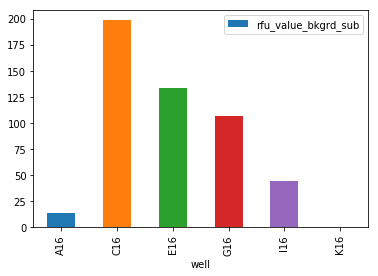

In [48]:
#plot the background subtracted RFU_values for each well as a barplot
DETECTR_4hr_cleaned.plot(x = 'well', y= 'rfu_value_bkgrd_sub', kind = 'bar')

In [49]:
#plot the background subtracted RFU_values for each well as a scatterplot
#pro tip: shift tab in the word plot gives info about other types of plots and options for plotting (color, title, etc)
DETECTR_4hr_cleaned.plot(x = 'well', y= 'rfu_value_bkgrd_sub', kind = 'scatter')

ValueError: scatter requires x column to be numeric

In [46]:
DETECTR_4hr_cleaned

,time,row_384,column_384,row_96,column_96,rfu_value,rfu_value_bkgrd_sub,well
384,04:00:00,A,16,A,8,18.718,13.355,A16
386,04:00:00,C,16,B,8,203.731,198.368,C16
388,04:00:00,E,16,C,8,139.044,133.681,E16
390,04:00:00,G,16,D,8,111.511,106.148,G16
392,04:00:00,I,16,E,8,49.657,44.294,I16
394,04:00:00,K,16,F,8,5.363,0.000,K16


In [125]:
#which rfu are less than the background?
#DETECTR_6hr.loc[DETECTR_6hr['rfu_value_bkgrd_sub']<0]

In [126]:
DETECTR_4hr['well'] = DETECTR_4hr['row_96'] + DETECTR_4hr['column_96'].map(str)

In [127]:
DETECTR_4hr.hvplot(x = 'well', y = 'rfu_value', kind = 'bar', rot = 90, width = 1000)

:Bars   [well]   (rfu_value)

In [128]:
DETECTR_4hr_reporter = DETECTR_4hr.loc[DETECTR_4hr['row_96'].isin (['A','B','C','D'])]

In [129]:
DETECTR_4hr_reporter['stock_conc']=[100]*4+[50]*4+[25]*4+[12.5]*4+[6.25]*4+[3.125]*4+[1.56]*4+[0.78]*4+[0.39]*4+[0.195]*4+[0.0975]*4+[0]*4

/Users/amy.lyden/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [131]:
DETECTR_4hr_reporter['gRNA']=['12G','12G','11B','11B']*12

/Users/amy.lyden/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [140]:
DETECTR_4hr_reporter['target_added']=['target added','no target']*24

/Users/amy.lyden/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [141]:
DETECTR_4hr_reporter

,time,row_384,column_384,row_96,column_96,rfu_value,well,stock_conc,gRNA,target_added
46080,04:00:00,A,1,A,1,288.440,A1,100.0000,12G,target added
46082,04:00:00,C,1,B,1,273.548,B1,100.0000,12G,no target
46084,04:00:00,E,1,C,1,1381.615,C1,100.0000,11B,target added
46086,04:00:00,G,1,D,1,289.733,D1,100.0000,11B,no target
46112,04:00:00,A,3,A,2,1051.860,A2,50.0000,12G,target added
46114,04:00:00,C,3,B,2,236.210,B2,50.0000,12G,no target
46116,04:00:00,E,3,C,2,2776.536,C2,50.0000,11B,target added
46118,04:00:00,G,3,D,2,247.237,D2,50.0000,11B,no target
46144,04:00:00,A,5,A,3,1191.817,A3,25.0000,12G,target added
46146,04:00:00,C,5,B,3,169.513,B3,25.0000,12G,no target


In [148]:
DETECTR_4hr_reporter.hvplot.scatter(x = 'stock_conc', y = 'rfu_value', xlabel = 'reporter stock concentration (uM)', by = 'target_added', groupby = 'gRNA', hover_cols = ['well','gRNA'], rot = 90, width = 500)

:DynamicMap   [gRNA]
   :NdOverlay   [target_added]
      :Scatter   [stock_conc]   (rfu_value,well,gRNA)

In [89]:
DETECTR_4hr_gDNA = DETECTR_4hr.loc[DETECTR_4hr['row_96'].isin (['E','F'])]

In [113]:
DETECTR_4hr_gDNA['stock_conc']=[360]*2+[180]*2+[90]*2+[45]*2+[22.5]*2+[11.25]*2+[5.625]*2+[2.8125]*2+[1.40625]*2+[0.703125]*2+[0]*2+[0]*2

In [101]:
DETECTR_4hr_gDNA['gRNA']=['11A','11E']*12

In [143]:
DETECTR_4hr_gDNA['target_added']=['target added']*22+['no target']*2

In [100]:
DETECTR_4hr_gDNA = DETECTR_4hr_gDNA.drop(['experiment_set'],axis = 1)

In [147]:
DETECTR_4hr_gDNA.hvplot.scatter(title = 'gDNA',x = 'stock_conc', y = 'rfu_value', by = 'target_added',groupby='gRNA', hover_cols = ['well'],rot = 90, width = 500)

:DynamicMap   [gRNA]
   :NdOverlay   [target_added]
      :Scatter   [stock_conc]   (rfu_value,well)

In [112]:
DETECTR_4hr_crRNA = DETECTR_4hr.loc[DETECTR_4hr['row_96'].isin (['G','H'])]

In [120]:
DETECTR_4hr_crRNA['stock_conc']=[1000]*2+[500]*2+[250]*2+[125]*2+[62.5]*2+[31.125]*2+[15.625]*2+[7.8125]*2+[3.9]*2+[1.95]*2+[0.98]*2+[0]*2

/Users/amy.lyden/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [135]:
DETECTR_4hr_crRNA['gRNA']=['11A','11E']*12

/Users/amy.lyden/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [149]:
DETECTR_4hr_crRNA.hvplot.scatter(title = 'crRNA',x = 'stock_conc', y = 'rfu_value', by='gRNA',hover_cols = ['well'],rot = 90, width = 500)

:NdOverlay   [gRNA]
   :Scatter   [stock_conc]   (rfu_value,well)

In [151]:
DETECTR_quadA1 = DETECTR_cleaned.loc[(DETECTR_cleaned["column_384"]%2 == 1) & (DETECTR_cleaned["row_384"].isin(['A','C','E','G','I','K','M','O']))]

In [153]:
DETECTR_quadA1['well'] = DETECTR_quadA1['row_96'] + DETECTR_quadA1['column_96'].map(str)

/Users/amy.lyden/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [157]:
DETECTR_quadA1.hvplot.line(title = 'kinetics',x = 'time', y = 'rfu_value', by='column_96', groupby='row_96',hover_cols = ['well'],rot = 90, height = 500,width = 500)

:DynamicMap   [row_96]
   :NdOverlay   [column_96]
      :Curve   [time]   (rfu_value,well)

## Conclusions
1. Need to repeat gDNA experiment - crRNA guide or reporter concentration too low, too much noise
2. Reporter concentration definitely increases signal - the relationship gets messier the higher you go. Maybe want to stick with 10uM
3. crRNA also increasees the signal - try this experiment again with more gRNAs and with higher reporter concentration